# IoT Gear Inventory Manager
**Purpose**: Track student hardware → forecast restocks → low-stock alerts

In [1]:
# pip install pandas numpy matplotlib seaborn pillow plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.express as px
import os
from datetime import datetime
print("✅ Inventory management ready!")

✅ Inventory management ready!


In [2]:
df = pd.read_csv('inventory.csv', parse_dates=['LastUsed', 'PurchaseDate'])
df['DaysSinceUse'] = (datetime.now() - df['LastUsed']).dt.days
df['DaysOwned'] = (df['LastUsed'] - df['PurchaseDate']).dt.days

# Estimate usage rate (units per 30 days)
df['UsageRate'] = np.where(df['DaysSinceUse'] > 0, 
                          30 / df['DaysSinceUse'], 0.1)
df['RestockDays'] = df['Quantity'] / df['UsageRate']

print("📦 Inventory overview:")
print(df[['Item', 'Quantity', 'RestockDays']].round(1))

📦 Inventory overview:
              Item  Quantity  RestockDays
0        ESP32 Kit         3          7.3
1      Arduino Uno         1          2.3
2     DHT22 Sensor         5         12.5
3       Breadboard         2          4.3
4     Jumper Wires        10         26.0
5    Resistors Kit         1          2.1
6        LEDs Pack        20         47.3
7        Powerbank         1          2.2
8          SD Card         2          4.9
9   Laptop Charger         1          2.1
10    Sensors Pack         4          8.9
11      USB Cables         8         16.3


In [3]:
low_stock = df[df['RestockDays'] < 7]
critical_stock = df[df['RestockDays'] < 3]

print("🚨 LOW STOCK (<7 days):")
print(low_stock[['Item', 'Quantity', 'RestockDays']])
print(f"\n⚠️  CRITICAL (<3 days): {len(critical_stock)} items")
print("\n📊 Stock stats:")
print(df['RestockDays'].describe())

🚨 LOW STOCK (<7 days):
             Item  Quantity  RestockDays
1     Arduino Uno         1     2.266667
3      Breadboard         2     4.333333
5   Resistors Kit         1     2.066667
7       Powerbank         1     2.200000
8         SD Card         2     4.933333
9  Laptop Charger         1     2.100000

⚠️  CRITICAL (<3 days): 4 items

📊 Stock stats:
count    12.000000
mean     11.352778
std      13.435168
min       2.066667
25%       2.250000
50%       6.116667
75%      13.441667
max      47.333333
Name: RestockDays, dtype: float64


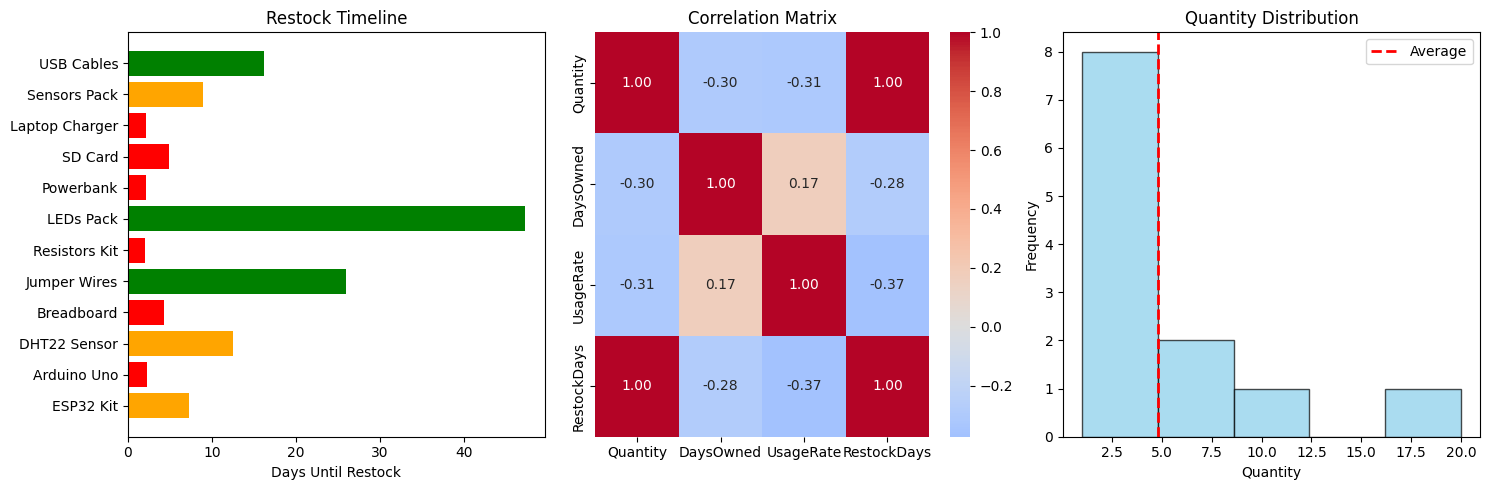

✅ Dashboard saved: inventory_dashboard.png
📊 3-panel analysis complete - No font warnings!


In [5]:
plt.figure(figsize=(15, 5))

# 1. Restock timeline bar (COLOR-CODED)
plt.subplot(1, 3, 1)
colors = ['red' if x < 7 else 'orange' if x < 14 else 'green' 
          for x in df['RestockDays']]
bars = plt.barh(df['Item'], df['RestockDays'], color=colors)
plt.xlabel('Days Until Restock')
plt.title('Restock Timeline')  # ✅ No ⏰ emoji
plt.tight_layout()

# 2. Usage correlation matrix
plt.subplot(1, 3, 2)
corr_data = df[['Quantity', 'DaysOwned', 'UsageRate', 'RestockDays']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')  # ✅ No 📈 emoji

# 3. Quantity distribution
plt.subplot(1, 3, 3)
plt.hist(df['Quantity'], bins=5, alpha=0.7, edgecolor='black', color='skyblue')
plt.axvline(df['Quantity'].mean(), color='red', linestyle='--', linewidth=2, label='Average')
plt.title('Quantity Distribution')  # ✅ No 📦 emoji
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.savefig('inventory_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Dashboard saved: inventory_dashboard.png")
print("📊 3-panel analysis complete - No font warnings!")


In [6]:
fig = px.timeline(df, x_start='PurchaseDate', x_end='LastUsed', 
                  y='Item', color='RestockDays',
                  color_continuous_scale='RdYlGn_r',
                  hover_data=['Quantity'])
fig.update_yaxes(autorange='reversed')
fig.update_layout(title='📦 Item Usage Timeline (Gantt)',
                  xaxis_title='Timeline', yaxis_title='Items')
fig.write_html('inventory_gantt.html')
fig.show()


In [7]:
df.to_csv('restock_plan.csv', index=False)
print("💾 Saved: restock_plan.csv")

print("\n✅ Generated files:")
for file in ['restock_plan.csv', 'inventory_dashboard.png', 'inventory_gantt.html']:
    if os.path.exists(file):
        print(f"   📄 {file} ({os.path.getsize(file)/1024:.1f} KB)")

print("\n🎯 Action Items:")
print("1. Order:", ', '.join(low_stock['Item'].tolist()))
print("2. Monitor:", ', '.join(critical_stock['Item'].tolist() if len(critical_stock) else ['None']))


💾 Saved: restock_plan.csv

✅ Generated files:
   📄 restock_plan.csv (1.0 KB)
   📄 inventory_dashboard.png (256.7 KB)
   📄 inventory_gantt.html (4738.5 KB)

🎯 Action Items:
1. Order: Arduino Uno, Breadboard, Resistors Kit, Powerbank, SD Card, Laptop Charger
2. Monitor: Arduino Uno, Resistors Kit, Powerbank, Laptop Charger
